In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = "dataset/image_folder/output_folder/image_500.jpg"

# Camera's intrinsic parameters
K = np.array([
    [698.86, 000.00, 306.91],
    [000.00, 699.13, 150.34],
    [000.00, 000.00, 001.00]
])

# Camera's distortion coefficients
d = np.array([0.191887, -0.563680, -0.0036176, -0.002037, 0.000])

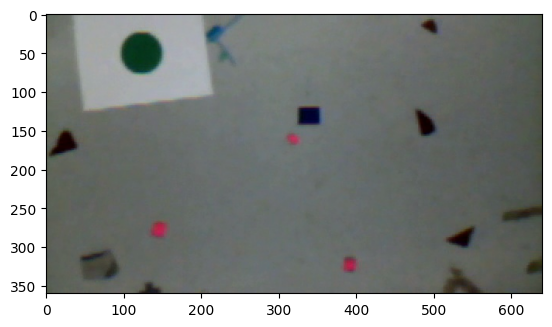

In [14]:
# display the image
image = cv2.imread(img)
plt.imshow(image)
plt.show()

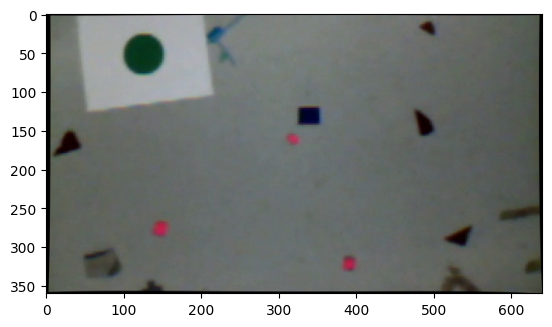

In [15]:
# undistort the image
undistorted_image = cv2.undistort(image, K, d)
plt.imshow(undistorted_image)
plt.show()

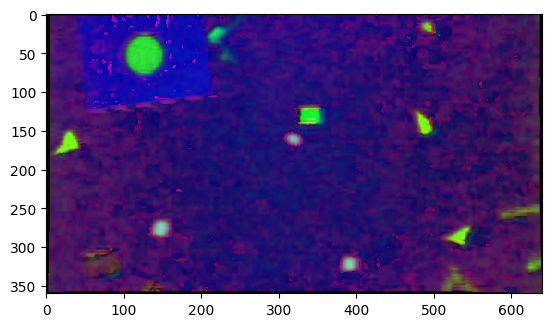

In [16]:
hsv = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

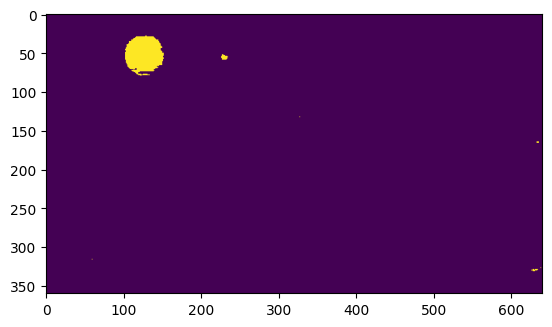

In [17]:
lower_green = np.array([35, 70, 20])
upper_green = np.array([80, 255, 255])

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask)


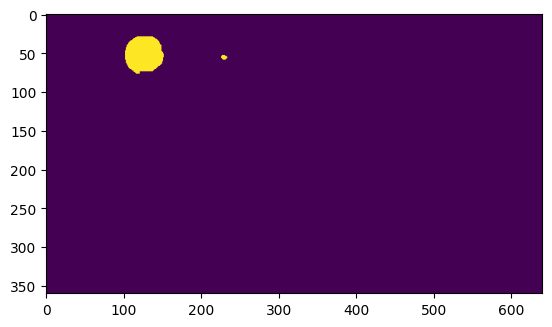

In [18]:
# remove noise
blur = cv2.medianBlur(mask, 5)
plt.imshow(blur)
plt.show()

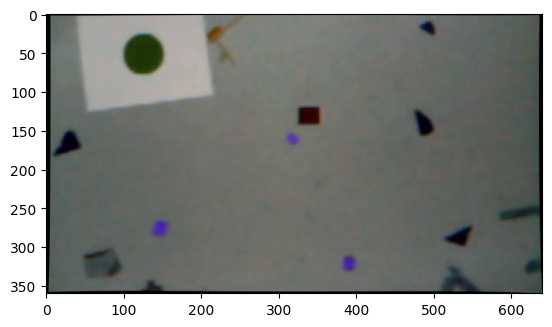

In [19]:
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=30, minRadius=5, maxRadius=100)

# draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(undistorted_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(undistorted_image, (i[0], i[1]), 2, (0, 0, 255), 3)
        
# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
# write center of circle on image, (i[0], i[1]) is the center in cyan color
if circles is not None:
    for i in circles[0, :]:
        plt.text(i[0], i[1], f'({i[0]}, {i[1]})', color='yellow')
plt.show()

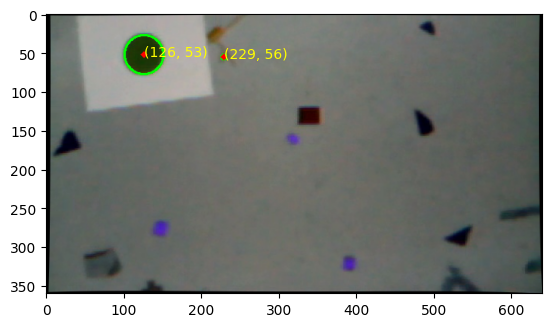

In [22]:
# using contours method
contours, _ = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(undistorted_image, center, radius, (0, 255, 0), 2)
    cv2.circle(undistorted_image, center, 2, (0, 0, 255), 3)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
# write center of circle on image, (i[0], i[1]) is the center in cyan color
for cnt in contours:
    (x, y), _ = cv2.minEnclosingCircle(cnt)
    plt.text(int(x), int(y), f'({int(x)}, {int(y)})', color='yellow')
plt.imshow(image_rgb)
plt.show()